<a href="https://colab.research.google.com/github/kriitiika10/EDA-Project/blob/main/22BDS0304_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("indian_food.csv")
df.head()

Saving indian_food.csv to indian_food (1).csv


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Mihidana,"Besan flour, sugar, ghee",vegetarian,15,30,sweet,dessert,West Bengal,East
1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West


In [52]:
print("Shape of dataset:", df.shape)

Shape of dataset: (255, 9)


In [53]:
# Summary for numerical columns
print(df.describe())

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [54]:
# Summary for categorical columns
print(df.describe(include='object'))

            name              ingredients        diet flavor_profile  \
count        255                      255         251            255   
unique       255                      252           2              5   
top     Mihidana  Gram flour, ghee, sugar  vegetarian          spicy   
freq           1                        2         223            133   

             course    state region  
count           254      255    253  
unique            4       25      7  
top     main course  Gujarat   West  
freq            129       35     74  


In [55]:
#check for any duplicate values
print(df.duplicated().sum())

0


#Data Handling

In [56]:
#checking for null values
df.isnull()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False


In [57]:
#number of null values per column
df.isnull().sum()

,0
name,0
ingredients,0
diet,4
prep_time,0
cook_time,0
flavor_profile,0
course,1
state,0
region,2


In [58]:
#replace -1 and '?' with NaN
df.replace(-1, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,4
prep_time,30
cook_time,28
flavor_profile,29
course,1
state,24
region,15


In [59]:
#forward fill method to handle missing values
df.ffill(inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


In [60]:
#mean of numerical values
print("cook_time mean=",df['cook_time'].mean())
print("prep_time mean=",df['prep_time'].mean())

cook_time mean= 38.03529411764706
prep_time mean= 32.898039215686275


#Univariate Analysis

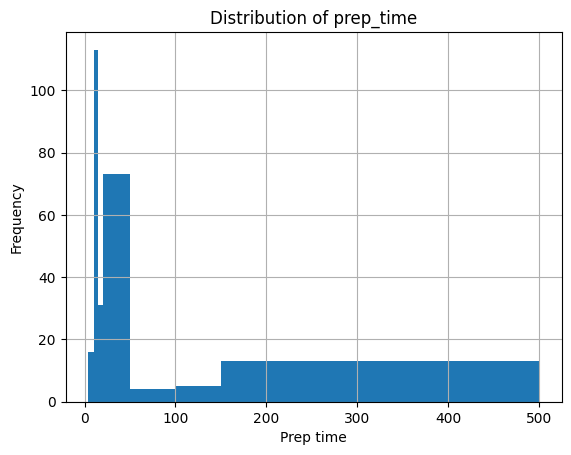

In [61]:
bins = [4, 10, 15, 20, 50, 100, 150, 500]
df['prep_time'].hist(bins=bins)
plt.title("Distribution of prep_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

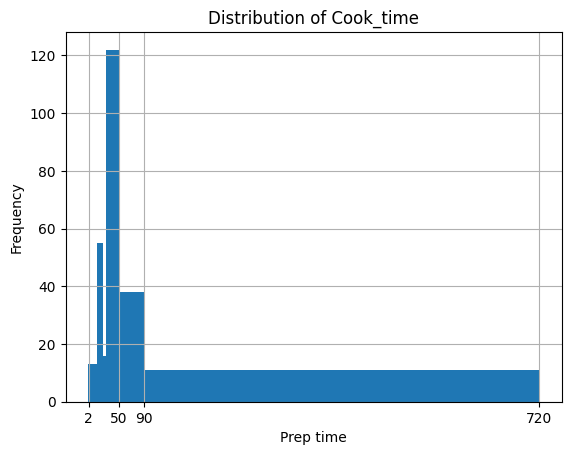

In [62]:
bins2 = [1, 15, 25, 30, 50, 90, 720]
df['cook_time'].hist(bins=bins2)
plt.xticks([2, 50, 90, 720])
plt.title("Distribution of Cook_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

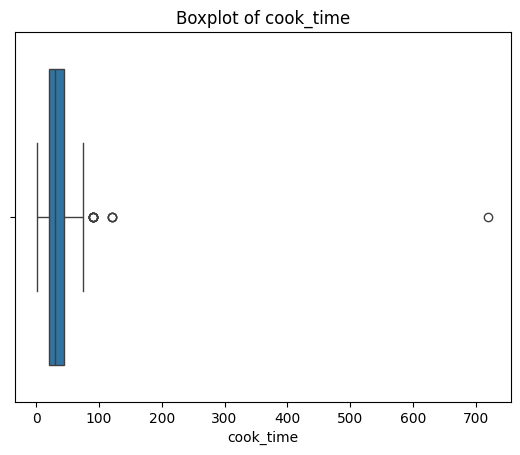

In [63]:
sns.boxplot(x=df['cook_time'])
plt.title("Boxplot of cook_time")
plt.show()

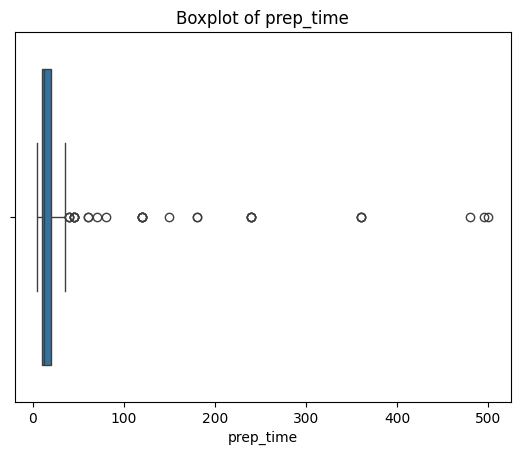

In [64]:
sns.boxplot(x=df['prep_time'])
plt.title("Boxplot of prep_time")
plt.show()

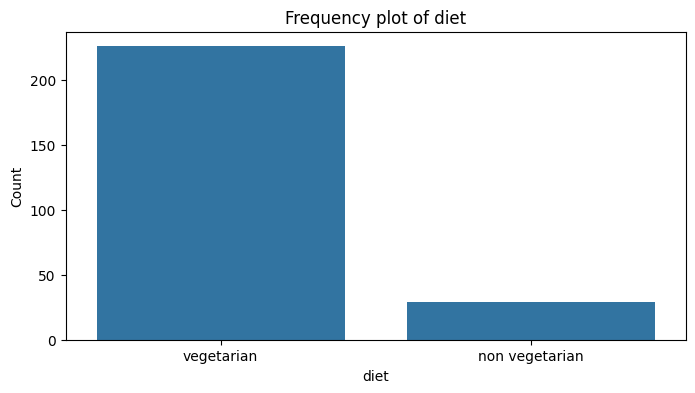

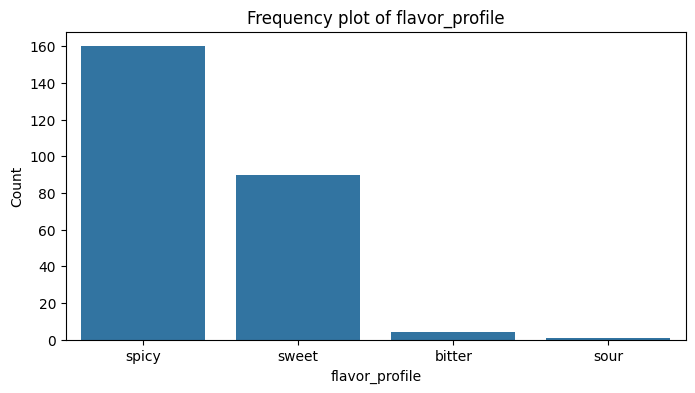

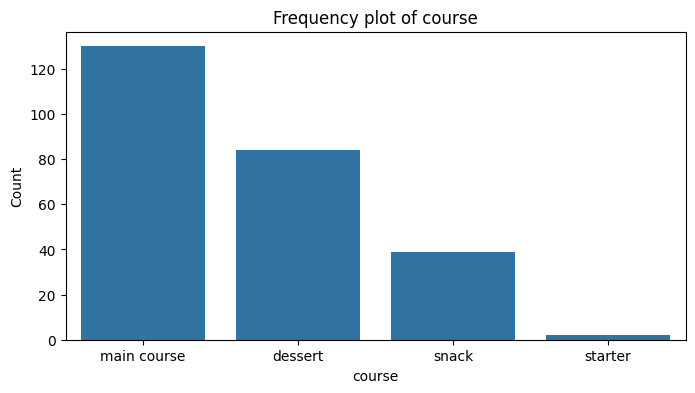

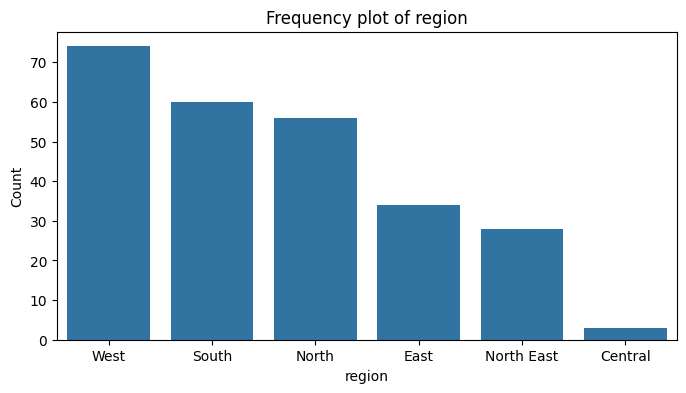

In [65]:
#Frequency plots of all categorical columns
cat_cols = ['diet','flavor_profile','course','region']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Frequency plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-638962756.py:2: SyntaxWarning: invalid escape sequence '\s'
  all_ingredients = df['ingredients'].str.split(',\s*').explode()


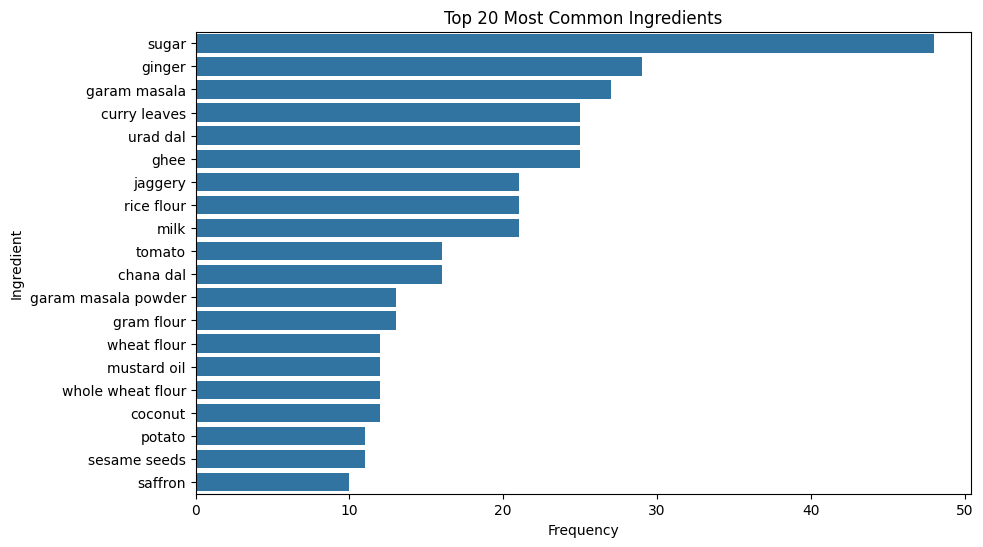

In [66]:
#plotting the frequency of ingredients
all_ingredients = df['ingredients'].str.split(',\s*').explode()
all_ingredients = all_ingredients.str.strip().str.lower()
ingredient_counts = all_ingredients.value_counts()
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.head(top_n).values,
            y=ingredient_counts.head(top_n).index)
plt.title(f"Top {top_n} Most Common Ingredients")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.show()

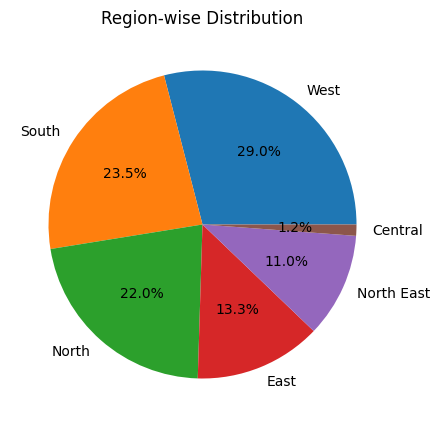

In [67]:
region_counts = df['region'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(region_counts,
        labels=region_counts.index,
        autopct='%1.1f%%')
plt.title("Region-wise Distribution")
plt.show()

#Bivariate Analysis

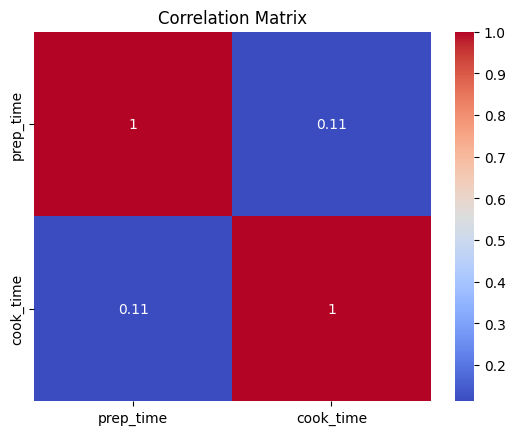

In [68]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

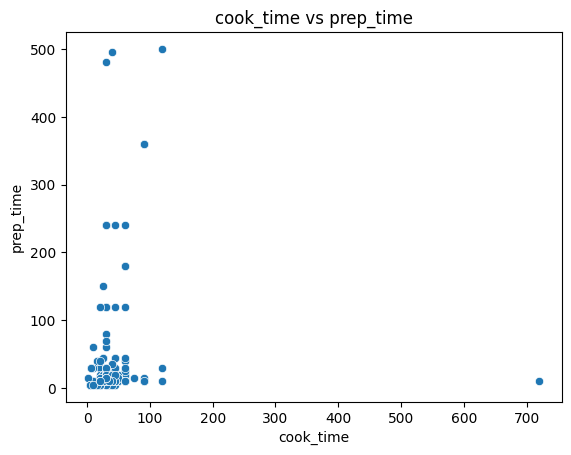

In [69]:
sns.scatterplot(data=df, x='cook_time', y='prep_time')
plt.title("cook_time vs prep_time")
plt.show()

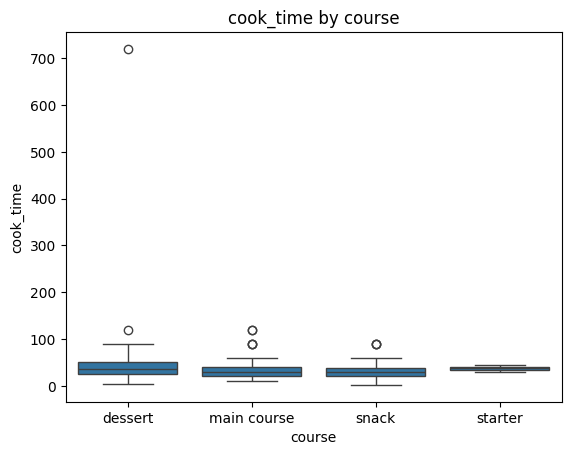

In [70]:
sns.boxplot(x='course', y='cook_time', data=df)
plt.title("cook_time by course")
plt.show()

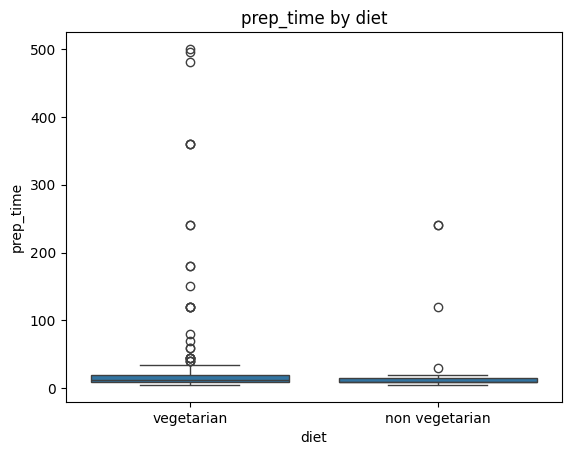

In [71]:
sns.boxplot(x='diet', y='prep_time', data=df)
plt.title("prep_time by diet")
plt.show()

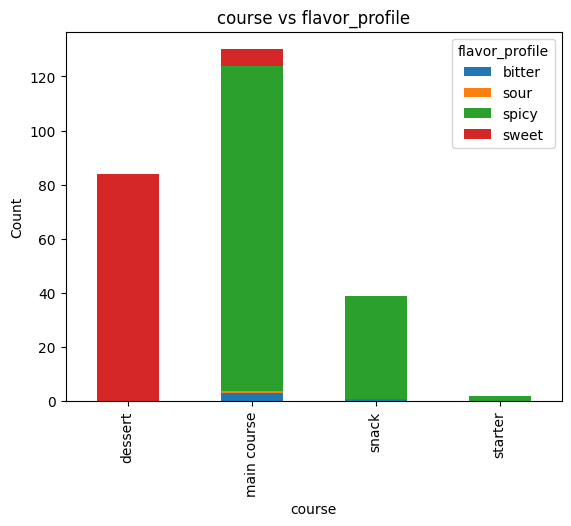

In [72]:
ct = pd.crosstab(df['course'], df['flavor_profile'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs flavor_profile")
plt.ylabel("Count")
plt.show()

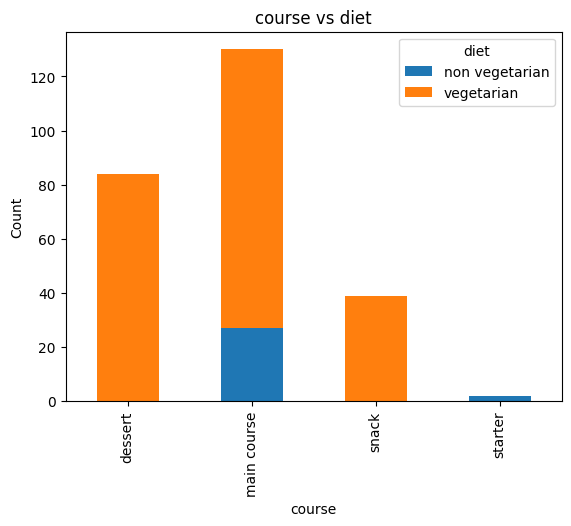

In [73]:
ct = pd.crosstab(df['course'], df['diet'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs diet")
plt.ylabel("Count")
plt.show()

# Multivariate Analysis

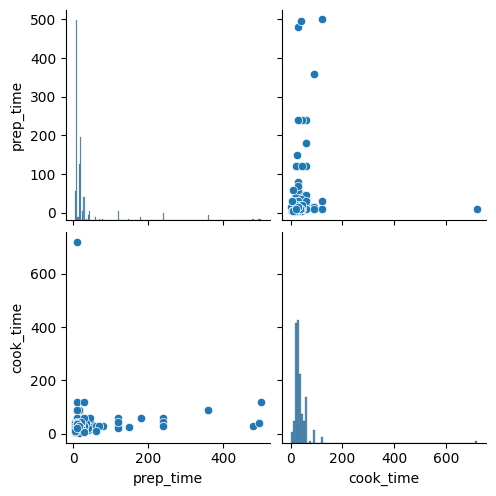

In [74]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

# 1D Analysis

In [75]:
#skewness
print("Skewness:\n", df.skew(numeric_only=True))

Skewness:
 prep_time     4.689272
cook_time    12.288702
dtype: float64


In [76]:
#kurtosis
print("Kurtosis:\n", df.kurt(numeric_only=True))

Kurtosis:
 prep_time     23.500957
cook_time    177.452989
dtype: float64


In [77]:
#quantiles
print("\nQuantiles:\n", df.quantile([0.25, 0.5, 0.75], numeric_only=True))


Quantiles:
       prep_time  cook_time
0.25       10.0       20.0
0.50       12.0       30.0
0.75       20.0       45.0


In [78]:
#outliers
num_df = df.select_dtypes(include=['int64','float64'])

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).sum()
print("Outliers per numerical column:\n", outliers)

Outliers per numerical column:
 prep_time    30
cook_time    11
dtype: int64


In [79]:
#frequency distribution for numerical
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head())


Frequency Distribution for prep_time:
prep_time
10.0    111
20.0     46
15.0     31
5.0      16
30.0     13
Name: count, dtype: int64

Frequency Distribution for cook_time:
cook_time
30.0    68
20.0    50
40.0    29
60.0    25
25.0    16
Name: count, dtype: int64


In [80]:
#frequency distribution for categorical
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head())


Frequency Distribution for name:
name
Mihidana          1
Balu shahi        1
Boondi            1
Gajar ka halwa    1
Ghevar            1
Name: count, dtype: int64

Frequency Distribution for ingredients:
ingredients
Gram flour, ghee, sugar                                                                           2
Chhena, sugar, ghee                                                                               2
Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                                         2
Maida flour, yogurt, oil, sugar                                                                   1
Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom    1
Name: count, dtype: int64

Frequency Distribution for diet:
diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

Frequency Distribution for flavor_profile:
flavor_profile
spicy     160
sweet      90
bitter      4
sour        1
Name: count, dtype: int64

Frequ

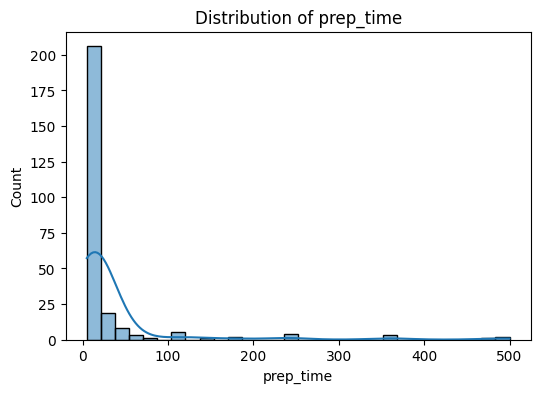

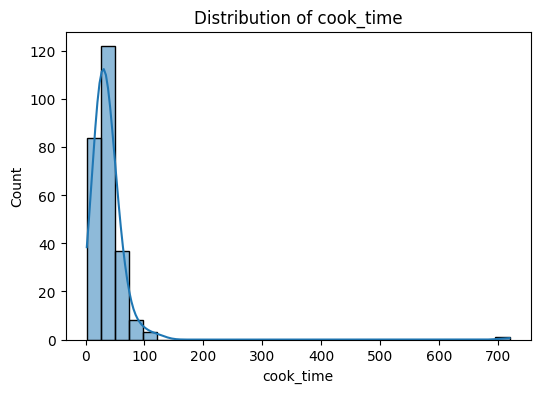

In [81]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# 2D Analysis

*numerical vs numerical*

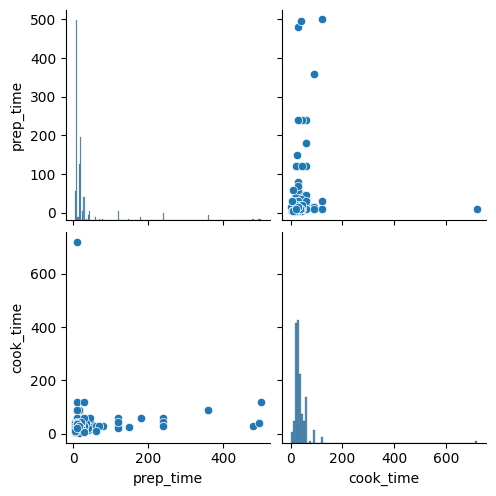

In [82]:
sns.pairplot(df.select_dtypes(include=['int64','float64']))
plt.show()

In [83]:
#correlation
print(df.corr(numeric_only=True))

           prep_time  cook_time
prep_time   1.000000   0.113635
cook_time   0.113635   1.000000


*numerical vs categorical*

In [84]:
#grouping regions by prep_time
print(df.groupby('region')['prep_time'].mean())

region
Central       13.333333
East          36.970588
North         35.267857
North East    21.964286
South         54.333333
West          16.783784
Name: prep_time, dtype: float64


In [85]:
print(df.groupby('flavor_profile')['cook_time'].median())

flavor_profile
bitter    35.0
sour      10.0
spicy     30.0
sweet     35.0
Name: cook_time, dtype: float64


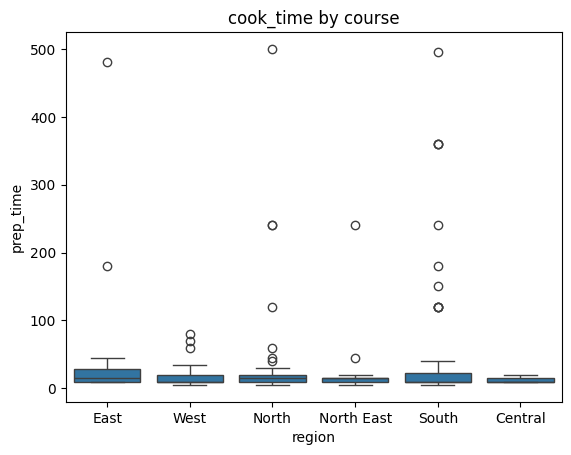

In [86]:
sns.boxplot(x='region', y='prep_time', data=df)
plt.title("cook_time by course")
plt.show()

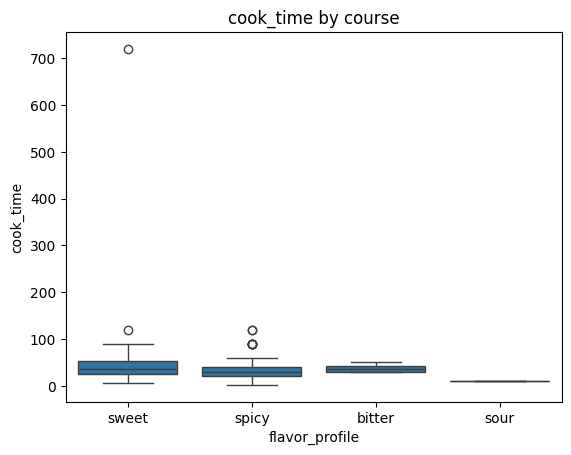

In [87]:
sns.boxplot(x='flavor_profile', y='cook_time', data=df)
plt.title("cook_time by course")
plt.show()

*categorical vs categorical*

In [88]:
#contingency table
cont_table = pd.crosstab(df['region'], df['course'])
print(cont_table)

course      dessert  main course  snack  starter
region                                          
Central           1            1      1        0
East             23           11      0        0
North            10           40      4        2
North East        9           19      0        0
South            18           31     11        0
West             23           28     23        0


In [89]:
# With proportions
cont_table_prop = pd.crosstab(df['region'], df['course'], normalize="index")
print(cont_table_prop)

course       dessert  main course     snack   starter
region                                               
Central     0.333333     0.333333  0.333333  0.000000
East        0.676471     0.323529  0.000000  0.000000
North       0.178571     0.714286  0.071429  0.035714
North East  0.321429     0.678571  0.000000  0.000000
South       0.300000     0.516667  0.183333  0.000000
West        0.310811     0.378378  0.310811  0.000000


In [90]:
#Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi-square test p-value:", p)
print("Since p-value < 0.05, this implies the variables are related to each other.")

Chi-square test p-value: 2.740377167033389e-07
Since p-value < 0.05, this implies the variables are related to each other.


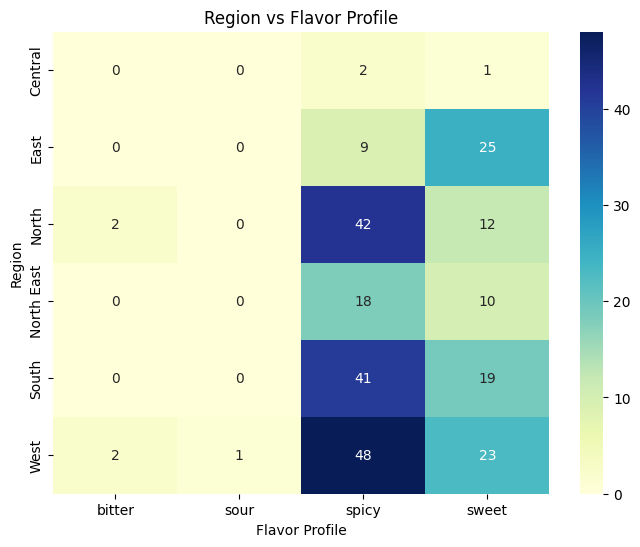

In [91]:
#heatmap for categorical variables
crosstab1 = pd.crosstab(df['region'], df['flavor_profile'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab1, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Region vs Flavor Profile")
plt.xlabel("Flavor Profile")
plt.ylabel("Region")
plt.show()

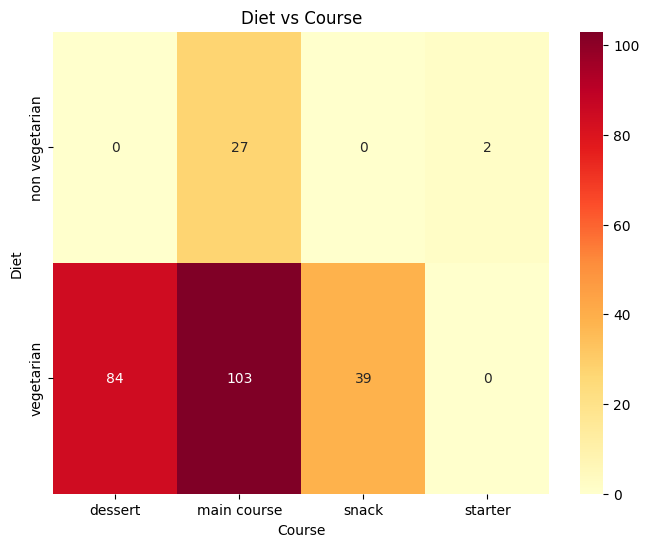

In [92]:
crosstab2 = pd.crosstab(df['diet'], df['course'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab2, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Diet vs Course")
plt.xlabel("Course")
plt.ylabel("Diet")
plt.show()

# 3D Analysis

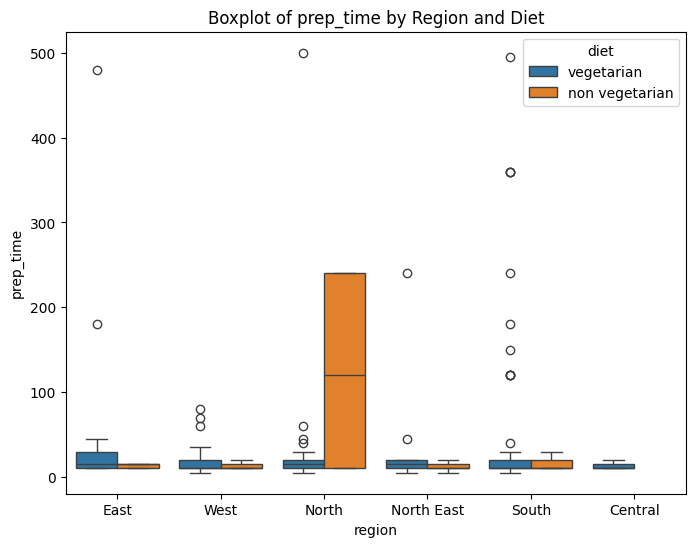

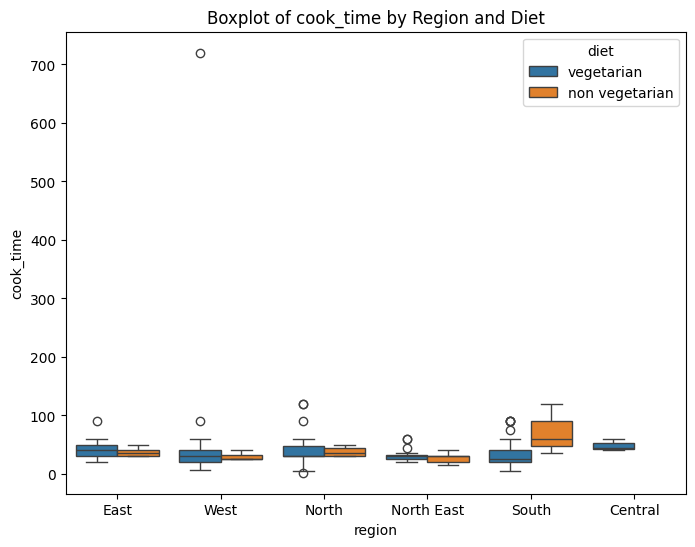

In [93]:
for num in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="region", y=num, hue="diet", data=df)
    plt.title(f"Boxplot of {num} by Region and Diet")
    plt.show()


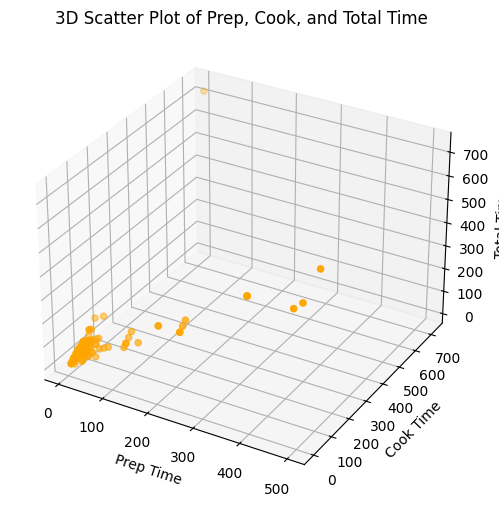

In [94]:
from mpl_toolkits.mplot3d import Axes3D

df['total_time'] = df['prep_time'] + df['cook_time']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['prep_time'], df['cook_time'], df['total_time'],
           c='orange', marker='o')

ax.set_xlabel("Prep Time")
ax.set_ylabel("Cook Time")
ax.set_zlabel("Total Time")
plt.title("3D Scatter Plot of Prep, Cook, and Total Time")
plt.show()


# K-means Clustering

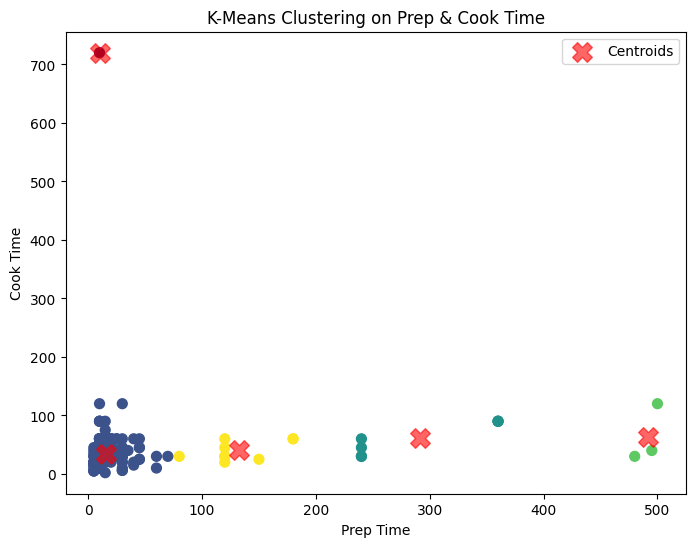

In [95]:
from sklearn.cluster import KMeans

X = df[['prep_time', 'cook_time']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(df['prep_time'], df['cook_time'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, alpha=0.6, label='Centroids')

plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.title("K-Means Clustering on Prep & Cook Time")
plt.legend()
plt.show()

# Principal Component Analysis

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical columns
X = df[['prep_time', 'cook_time']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 1 component
pca = PCA(n_components=1)
pca_1d = pca.fit_transform(X_scaled)

# Store in dataframe
df['PCA_1D'] = pca_1d

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.55681726]


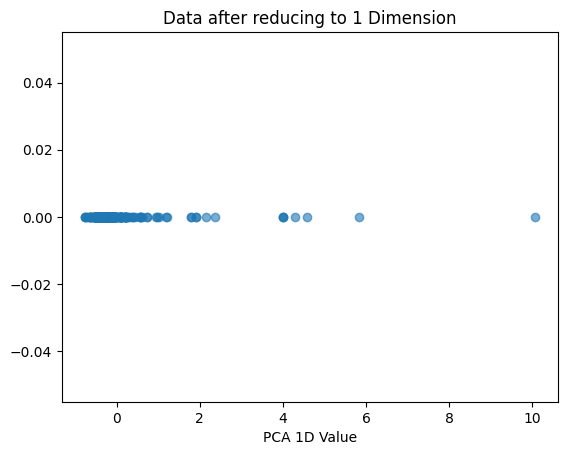

In [97]:
plt.scatter(df['PCA_1D'], [0]*len(df), alpha=0.6)
plt.xlabel("PCA 1D Value")
plt.title("Data after reducing to 1 Dimension")
plt.show()

# Model Building

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

df['total_time'] = df['prep_time'] + df['cook_time']

X = df[['prep_time', 'total_time', 'course', 'diet']]
y = df['cook_time']

# One-hot encoding
X = pd.get_dummies(X, columns=['course','diet'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Model Evaluation

In [99]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.9072245242548924
RMSE: 2.235863131900061
R2: 0.9811842596919492
